# Práctica 3: limpieza de datos

##### Cookbook [@calidad-y-pre-procesamiento-de-datos-2020-1](https://nbviewer.jupyter.org/github/JacoboGGLeon/calidad-y-pre-procesamiento-de-datos-2020-1/blob/master/README.ipynb)

## Resources

* [An Essential Guide to Exploratory Data Analysis and Data Cleaning](https://medium.com/swlh/a-complete-guide-to-exploratory-data-analysis-and-data-cleaning-dd282925320f)
* [Data Cleaning in Python: the Ultimate Guide (2020)](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)
* [Sberbank Russian Housing Market](https://www.kaggle.com/c/sberbank-russian-housing-market/overview/description)
* [How To Manipulate Date And Time In Python Like A Boss](https://towardsdatascience.com/how-to-manipulate-date-and-time-in-python-like-a-boss-ddea677c6a4d)
* [HTML color codes](https://htmlcolorcodes.com/)

## Recipe 

La limpieza o depuración de datos es el proceso de detección y corrección (o eliminación) de registros corruptos o inexactos de un conjunto de registros, tabla o base de datos y se refiere a la identificación de partes incompletas, incorrectas, inexactas o irrelevantes de los datos y luego a la sustitución, modificación o eliminación de los *datos sucios*.

![](https://miro.medium.com/max/1315/1*6NZejVJz5nmxgHeWWTc2Iw.png)

El objetivo de este proyecto es predecir las fluctuaciones del precio de la vivienda en Rusia. No estamos limpiando todo el conjunto de datos, pero mostraremos ejemplos de ello.
Antes de entrar en el proceso de limpieza, echemos un breve vistazo a los datos.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #silence

### Exploración de los datos

In [4]:
# read the data
df = pd.read_csv('sberbank-russian-housing-market/train.csv')
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [6]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [5]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [7]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


Se revisó que el conjunto de datos tiene 30,471 observaciones y 292 características. También se identificaron las características numéricas o categóricas. Todas ellas son información útil. Ahora podemos revisar la lista de tipos de datos "sucios" y arreglarlos uno por uno.

### Datos faltantes

#### Técnica #1: mapa de calor de los datos faltantes

En la siguiente figura se muestran los patrones de datos que faltan de las primeras 30 características. El eje horizontal muestra el nombre de la característica; el eje vertical muestra el número de observaciones/filas; el color azul representa los datos que faltan, mientras que el color gris, en caso contrario.
Por ejemplo, vemos que la característica`life_sq` tiene valores perdidos en muchas filas. Mientras que la característica `floor` sólo tiene pequeños valores perdidos alrededor de la observación 7000.

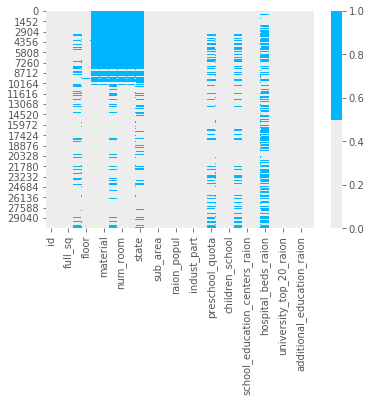

In [13]:
cols = df.columns[:30] # first 30 columns
colours = ['#EEEDED', '#00B6FF'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### Técnica #2: Lista de porcentaje de datos faltantes

In [25]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if (pct_missing > 0):
        #print(pct_missing)
        print('{} - {}%'.format(col, round(pct_missing*100)))

life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
preschool_quota - 22.0%
school_quota - 22.0%
hospital_beds_raion - 47.0%
raion_build_count_with_material_info - 16.0%
build_count_block - 16.0%
build_count_wood - 16.0%
build_count_frame - 16.0%
build_count_brick - 16.0%
build_count_monolith - 16.0%
build_count_panel - 16.0%
build_count_foam - 16.0%
build_count_slag - 16.0%
build_count_mix - 16.0%
raion_build_count_with_builddate_info - 16.0%
build_count_before_1920 - 16.0%
build_count_1921-1945 - 16.0%
build_count_1946-1970 - 16.0%
build_count_1971-1995 - 16.0%
build_count_after_1995 - 16.0%
metro_min_walk - 0.0%
metro_km_walk - 0.0%
railroad_station_walk_km - 0.0%
railroad_station_walk_min - 0.0%
ID_railroad_station_walk - 0.0%
cafe_sum_500_min_price_avg - 44.0%
cafe_sum_500_max_price_avg - 44.0%
cafe_avg_price_500 - 44.0%
cafe_sum_1000_min_price_avg - 21.0%
cafe_sum_1000_max_price_avg - 21.0%
cafe_avg_pr

Esto produce una lista abajo que muestra el porcentaje de valores faltantes para cada una de las características. Específicamente, vemos que a la característica `life_sq` le falta el 21%, mientras que a la característica `floor` sólo le falta el 1%. Esta lista es un resumen útil que puede complementar la visualización del mapa de calor.

#### Técnica #3: Histograma de datos faltantes

El histograma de datos faltantes es también una técnica para cuando tenemos muchas características.
Para aprender más sobre los patrones de valores perdidos entre las observaciones, podemos visualizarlos mediante un histograma.

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

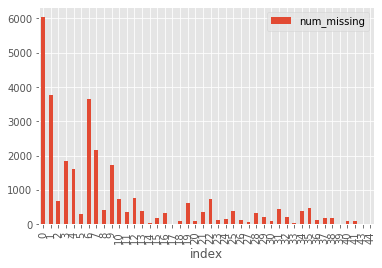

In [28]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Este histograma ayuda a identificar las situaciones de valores perdidos entre las 30,471 observaciones.
Por ejemplo, hay más de 6000 observaciones sin valores perdidos y cerca de 4000 observaciones con un valor perdido.

#### ¿Qué hacer?

En general no hay soluciones acordadas para tratar con los datos que faltan. Tenemos que estudiar la característica en particular y el conjunto de datos para decidir la mejor manera de manejarlos.
A continuación se describen los cuatro métodos más comunes para manejar los datos que faltan. Pero, si la situación es más complicada de lo habitual, tenemos que ser creativos para usar métodos más sofisticados como el modelado (impute) de datos faltantes.

#### Técnica #1: Histograma y Box Plot

Cuando la característica es numérica, podemos usar un histograma y un box plot para detectar los valores atípicos. A continuación se muestra el histograma de la característica `life_sq`.

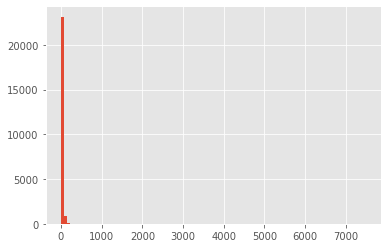

In [31]:
# histogram of life_sq.
df['life_sq'].hist(bins=100)

En la figura siguiente se puede ver que los datos parecen muy sesgados con la posible existencia de valores atípicos. Para analizar la característica más de cerca, se usan los *box plot*.

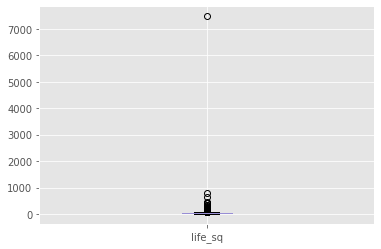

In [30]:
# box plot.
df.boxplot(column=['life_sq'])

En esta figura, podemos ver que hay un atípico con un valor de más de 7000.

#### Técnica #2: Estadística descriptiva

In [32]:
df['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Además, para las características numéricas, los valores atípicos podrían ser tan distintos que el *box plot* no puede visualizarlos. En su lugar, podemos mirar sus estadísticas descriptivas.
Por ejemplo, para la característica `life_sq` de nuevo, podemos ver que el valor máximo es `7478`, mientras que el cuartil 75% es sólo `43`. El valor de `7478` es un valor atípico.

#### Técnica #3: Gráfico de barras

Cuando la característica es categórica podemos usar un gráfico de barras para aprender sobre sus categorías y distribución. Por ejemplo, la característica `ecology` tiene una distribución casi equilibrada. Pero si hay una categoría con un solo valor llamado `other` (NS/NC), entonces sería un atípico.

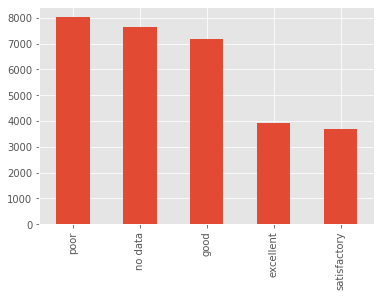

In [33]:
# bar chart -  distribution of a categorical variable
df['ecology'].value_counts().plot.bar()

Otras técnicas: Muchas otras técnicas también pueden detectar valores atípicos, como la gráfica de dispersión (scatter plot), el test Z-score y clustering.

#### ¿Qué hacer con los valores atípicos?

Aunque los valores atípicos no son difíciles de detectar, tenemos que determinar las soluciones adecuadas para manejarlos. Depende en gran medida del conjunto de datos y del objetivo del proyecto.
Los métodos para manejar los valores atípicos son algo similar a los datos que faltan. O bien los eliminamos, los ajustamos o los conservamos.

### Datos innecesarios

Todos los datos que se introduzcan en el modelo deberían servir para el propósito del proyecto. Los datos innecesarios son cuando los datos no añaden valor. Cubrimos tres tipos principales de datos innecesarios debido a diferentes razones.

#### Tipo innecesario #1: Desinformativo / Repetitivo

A veces una característica no es informativa porque tiene demasiadas observaciones que tienen el mismo valor.

#### ¿Cómo averiguarlo?

Podemos crear una lista de característicass con un alto porcentaje del mismo valor.
Por ejemplo, especificamos a continuación para mostrar las características con más del 95% de filas que tienen el mismo valor.

In [34]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosque_count_1000: 98.08342%
0    29887
1      584
Name: mosque_count_1000, dtype: int64

mosque_count_1500: 96.21936%
0    29

#### ¿Qué hacer?

Necesitamos entender las razones detrás de la característica repetitiva. Cuando son genuinamente desinformativas, podemos descartarlas.

#### Tipo innecesario #2: Irrelevante

Una vez más, los datos deben proporcionar información valiosa para el proyecto. Si las características no están relacionadas con la cuestión que estamos tratando de resolver en el proyecto, son irrelevantes.

#### ¿Cómo averiguarlo?

Necesitamos hojear las características para identificar las irrelevantes.
Por ejemplo, un rasgo que registra la temperatura en Toronto no proporciona ninguna información útil para predecir los precios de las viviendas en Rusia.

#### ¿Qué hacer?

Cuando las características no sirven al objetivo del proyecto, podemos eliminarlas.

*feature selection*

#### Tipo innecesario #3: Duplicados

Los datos duplicados son cuando existen copias de la misma observación.
Hay dos tipos principales de datos duplicados.

#### Duplicados tipo #1: todas las características

#### ¿Cómo averiguarlo?

Este duplicado ocurre cuando todos los valores de las características dentro de las observaciones son los mismos. Es fácil de encontrar.
Primero quitamos el identificador único del conjunto de datos. Luego creamos un conjunto de datos llamado `df_dedupped` eliminando los duplicados. Comparamos las formas de los dos conjuntos de datos (`df` y `df_dedupped`) para averiguar el número de filas duplicadas.

In [35]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


#### Duplicados tipo #2: características claves

#### ¿Cómo averiguarlo?

A veces es mejor eliminar los datos duplicados basándose en un conjunto de identificadores únicos.
Por ejemplo, las posibilidades de que dos transacciones ocurran al mismo tiempo, con la misma superficie, el mismo precio y el mismo año de construcción son casi nulas.
Podemos establecer un grupo de características críticas como identificadores únicos para las transacciones. Incluimos `timestamp`, `full_sq`, `life_sq`, `floor`, `build_year`, `num_room`, `price_doc`. Comprobamos si hay duplicados basados en ellos.

In [36]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2014-12-09  40       -999.0   17.0   -999.0       1.0      4607265      2
2014-04-15  134       134.0   1.0     0.0         3.0      5798496      2
2013-08-30  40       -999.0   12.0   -999.0       1.0      4462000      2
2012-09-05  43       -999.0   21.0   -999.0      -999.0    6229540      2
2013-12-05  40       -999.0   5.0    -999.0       1.0      4414080      2
2014-12-17  62       -999.0   9.0    -999.0       2.0      6552000      2
2013-05-22  68       -999.0   2.0    -999.0      -999.0    5406690      2
2012-08-27  59       -999.0   6.0    -999.0      -999.0    4506800      2
2013-04-03  42       -999.0   2.0    -999.0      -999.0    3444000      2
2015-03-14  62       -999.0   2.0    -999.0       2.0      6520500      2
2014-01-22  46        28.0    1.0     1968.0      2.0      3000000      2
2012-10-22  61       -999.0   18.0   -999.0      -999.0    8248500      2
2013-09-23  85       -999.0   14.0   -999.0

#### ¿Qué hacer?

Podemos eliminar estos duplicados basándonos en las características principales.

In [37]:
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 344)
(30455, 344)


### Datos inconsistentes

También es crucial que el conjunto de datos siga estándares específicos para ajustarse a un modelo. Necesitamos explorar los datos de diferentes maneras para encontrar los datos inconsistentes. La mayor parte del tiempo, depende de las observaciones y la experiencia. No hay un código establecido para ejecutarlo y arreglarlo todo. A continuación cubrimos cuatro tipos de datos inconsistentes.

#### Tipo inconsistente #1: Capitalización

El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas.

#### ¿Cómo averiguarlo?

Veamos la característica de `sub_área`.

In [38]:
df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

La característica `sub_area` se ve bien, pero a veces hay un uso inconsistente de las mayúsculas dentro de la misma característica. El "Poselenie Sosenskoe" y "pOseleNie sosenskeo" podrían referirse a la misma área.

#### ¿Qué hacer?

Para evitarlo, podemos poner todas las letras en minúsculas (o mayúsculas).

In [39]:
# make everything lower case.
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie mihajlovo-jarcevskoe       1
poselenie klenovskoe                 1
Name: sub_area_lower, Length: 146, dtype: int64

#### Tipo inconsistente #2: Formatos

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir la característica `timestamp` al formato DateTime.

In [41]:
df.timestamp.value_counts()

2014-12-16    160
2014-12-09    147
2014-06-30    133
2014-12-18    118
2014-11-25     93
             ... 
2014-02-16      1
2011-09-05      1
2011-09-09      1
2015-01-05      1
2011-08-27      1
Name: timestamp, Length: 1161, dtype: int64

#### ¿Cómo averiguarlo?

La característica `timestamp` está en formato objeto siendo que representa fechas.

In [40]:
df.timestamp.describe()

count          30471
unique          1161
top       2014-12-16
freq             160
Name: timestamp, dtype: object

#### ¿Qué hacer?

Podemos convertirlo y extraer los valores de fecha u hora usando el código que se muestra a continuación. Después de esto, es más fácil analizar el grupo de volumen de transacciones por año o mes.

In [42]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


#### Tipo inconsistente #3: Valores categóricos

Una característica categórica tiene un número limitado de valores (símbolos). A veces puede haber otros valores debido a razones como los errores tipográficos.

#### ¿Cómo averiguarlo?

Necesitamos observar la característica para descubrir esta inconsistencia. Mostrémoslo con un ejemplo.
Creamos un nuevo conjunto de datos a continuación. Por ejemplo, el valor de la ciudad fue escrito con errores como "torontoo" y "tronto". Pero ambos se refieren al valor correcto "toronto".
Una forma sencilla de identificarlos es la [distancia edit](https://en.wikipedia.org/wiki/Edit_distance). Mide cuántas letras (distancia) necesitamos para cambiar la ortografía de un valor para que coincida con otro valor.
Sabemos que las categorías sólo deben tener cuatro valores de "toronto", "vancouver", "montreal" y "calgary". Calculamos la distancia entre todos los valores y la palabra "toronto" (y "vancouver"). Vemos que los que pueden ser errores tipográficos tienen una distancia menor con la palabra correcta. Ya que sólo se diferencian por un par de letras.

In [43]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


#### ¿Qué hacer?

Podemos establecer criterios para convertir estos errores tipográficos a los valores correctos. Por ejemplo, el siguiente código establece que todos los valores dentro de una distancia de 2 letras de "toronto" sean "toronto".

In [44]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


#### Tipo inconsistente #4: Direcciones

La característica de la dirección podría ser un dolor de cabeza para muchos de nosotros. Porque la gente que introduce los datos en la base de datos a menudo no sigue un formato estándar.

#### ¿Cómo averiguarlo?

Podemos encontrar datos de direcciones desordenados mirándolos. Aunque a veces no podemos detectar ningún problema, podemos ejecutar el código para estandarizarlos.
No hay una columna de direcciones en nuestro conjunto de datos por razones de privacidad. Así que creamos un nuevo conjunto de datos `df_add_ex` con la dirección de la característica.

In [45]:
# no address column in the housing dataset. So create one to show the code.
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


#### ¿Qué hacer?

Ejecutamos el siguiente código para poner las letras en minúsculas, eliminar los espacios en blanco, eliminar los puntos y estandarizar las palabras.

In [46]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
